<a href="https://colab.research.google.com/github/ydv1412/airline_review_classification/blob/main/airline_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel('/content/drive/MyDrive/capstone project /supervised_learning_classification/data_airline_review_classification/data_airline_reviews.xlsx' , 
                skiprows = lambda x: x%2!=0 )     # skipping rows

In [64]:
df.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          52435 non-null  object 
 1   overall          51145 non-null  float64
 2   author           52435 non-null  object 
 3   review_date      52435 non-null  object 
 4   customer_review  52435 non-null  object 
 5   aircraft         17141 non-null  object 
 6   traveller_type   31293 non-null  object 
 7   cabin            50909 non-null  object 
 8   route            31270 non-null  object 
 9   date_flown       31192 non-null  object 
 10  seat_comfort     48882 non-null  float64
 11  cabin_service    48906 non-null  float64
 12  food_bev         44338 non-null  float64
 13  entertainment    37692 non-null  float64
 14  ground_service   31006 non-null  float64
 15  value_for_money  50938 non-null  float64
 16  recommended      51195 non-null  object 
dtypes: float64(7

1.Univariate analysis

In [110]:
df_2 = df.groupby(by = ['airline' ,'recommended']).size()       ### getting airline_wise recommendation counts 
df_3 = df.groupby(by = ['airline','recommended']).count().reset_index()
df_3 = pd.DataFrame(data = df_3 , columns = ['airline' , 'recommended'])
df_3['counts'] = list(df_2)
df_3.head(10)

,airline,recommended,counts
0,ANA All Nippon Airways,no,76
1,ANA All Nippon Airways,yes,385
2,Aegean Airlines,no,104
3,Aegean Airlines,yes,418
4,Aeroflot Russian Airlines,no,179
5,Aeroflot Russian Airlines,yes,316
6,Aeromexico,no,251
7,Aeromexico,yes,173
8,Air Canada,no,758
9,Air Canada,yes,492


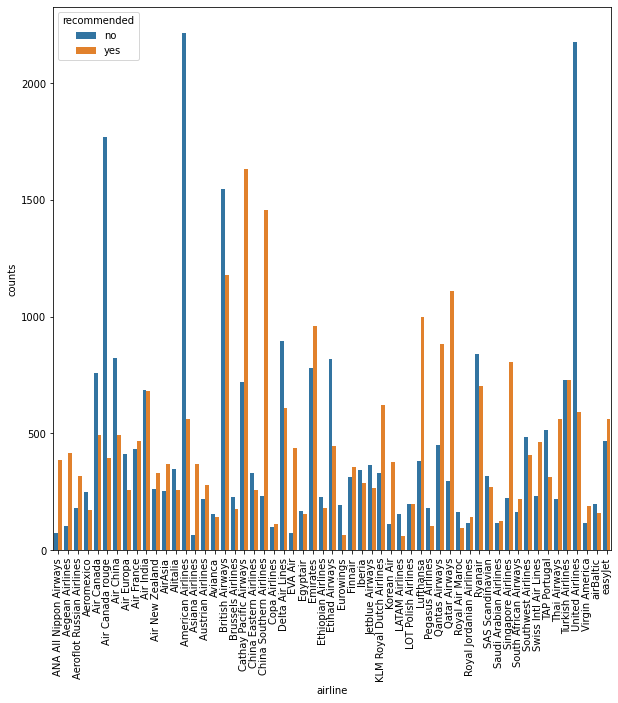

In [113]:
plt.figure(figsize = (10,10))

sns.barplot(data = df_3 , x='airline',y = 'counts' ,hue = 'recommended')
plt.xticks(rotation = 90)
plt.show()

In [129]:
df_approval = df_3.groupby(by = 'airline')['counts'].sum().reset_index(name = 'total')
print(df_approval.shape)
df_approval.head(10)

# df_approval['percentage'] = df_approval.apply(lambda x: (df[df_3['airline']==x[0] and df_3['recommended']=='yes']['counts'])/x['total'])

(57, 2)


,airline,total
0,ANA All Nippon Airways,461
1,Aegean Airlines,522
2,Aeroflot Russian Airlines,495
3,Aeromexico,424
4,Air Canada,1250
5,Air Canada rouge,2162
6,Air China,1314
7,Air Europa,670
8,Air France,899
9,Air India,1366


In [131]:
t = list(df_3[df_3['recommended'] == 'yes']['counts'])
df_approval['yes_count'] = t

In [132]:
df_approval.head(10)

,airline,total,yes_count
0,ANA All Nippon Airways,461,385
1,Aegean Airlines,522,418
2,Aeroflot Russian Airlines,495,316
3,Aeromexico,424,173
4,Air Canada,1250,492
5,Air Canada rouge,2162,394
6,Air China,1314,492
7,Air Europa,670,256
8,Air France,899,466
9,Air India,1366,680


In [139]:
df_approval['approval_rate'] = df_approval['yes_count']/df_approval['total']

In [140]:
df_approval.head(10)

,airline,total,yes_count,approval_rate
0,ANA All Nippon Airways,461,385,0.835141
1,Aegean Airlines,522,418,0.800766
2,Aeroflot Russian Airlines,495,316,0.638384
3,Aeromexico,424,173,0.408019
4,Air Canada,1250,492,0.393600
5,Air Canada rouge,2162,394,0.182239
6,Air China,1314,492,0.374429
7,Air Europa,670,256,0.382090
8,Air France,899,466,0.518354
9,Air India,1366,680,0.497804


[]

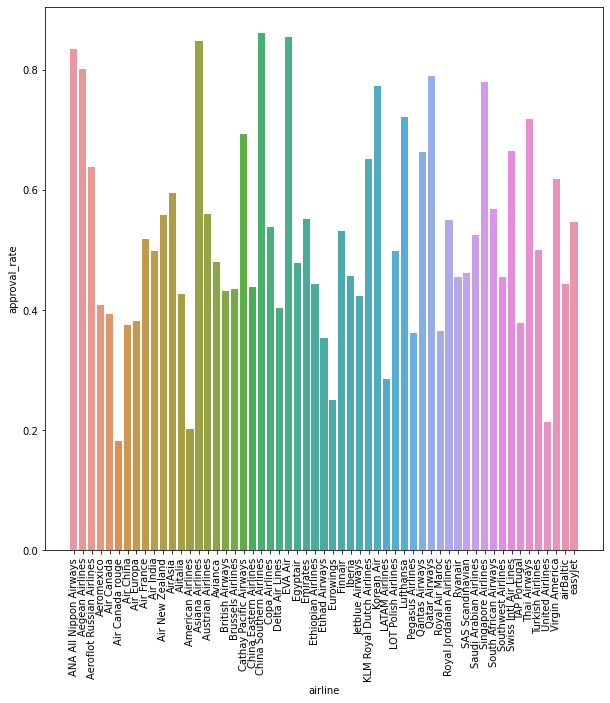

In [143]:
plt.figure(figsize=(10,10))

sns.barplot(data = df_approval , x = 'airline' , y = 'approval_rate')
plt.xticks(rotation = 90)
plt.plot()